In [2]:
import sys
import pickle

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

if "/home/axel/Studier/BdG-numerical/methods" not in sys.path:
    sys.path.append("/home/axel/BdG-numerical/methods")
    
from bdg_method import BdG_method
from modified_bdg_method import MBdG_method

from utils import (
    calculate_critical_temperature, 
    find_critical_temperature
)

In [3]:
%load_ext autoreload
%autoreload 2

T = 0.04 T = 0.04 T = 0.04 T = 0.05 T = 0.05 T = 0.05 T = 0.05 T = 0.06 T = 0.06 T = 0.06 

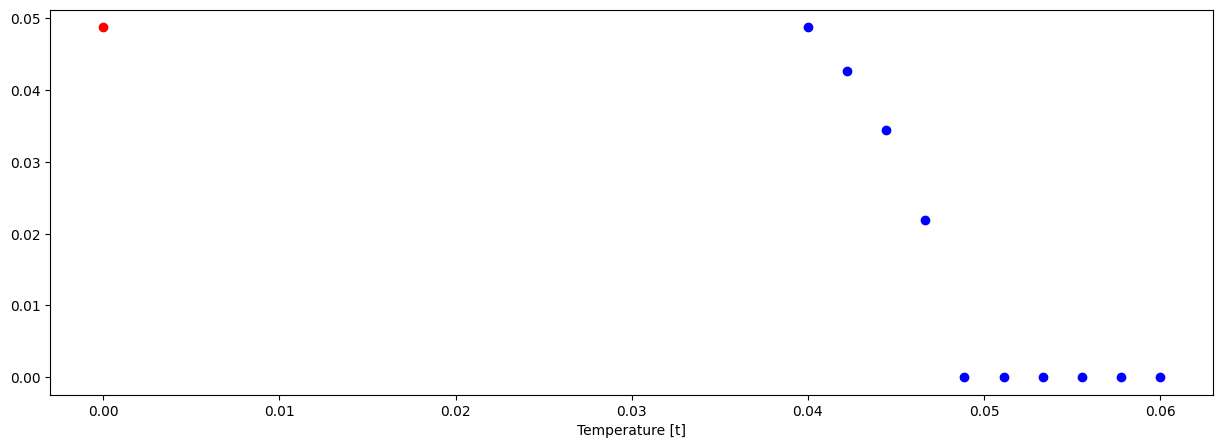

In [6]:
# Calculating the gap parameter amplitude
N = 40
Nc = 2
t = 1

mu = 0.5 * t
V = 1.4 * t

convergence_threshold = 1e-7

T_set = np.linspace(0.04, 0.06, 10)

fig, axs = plt.subplots(1, 1, figsize=(15,5))

deltas = []

# Creating a BdG instance
solver = BdG_method(N, Nc, mu, t, V, T_set[0], convergence_threshold)
for i, T in enumerate(T_set):
    print("T = {0}".format(round(T, 2)), end=" ")
    solver.set_temperature(T)
    solver.run_solver()
    deltas.append(solver.get_global_delta())
        
axs.scatter(T_set, deltas, c="b")    
axs.set_xlabel("Temperature [t]")
    
axs.scatter(0, deltas[0], c="red")



In [5]:
Tc = calculate_critical_temperature(deltas[0])
Tc_num = find_critical_temperature(T_set, deltas)

print(Tc, Tc_num)

0.039023524996909226 0.048275862068965524


0.1K


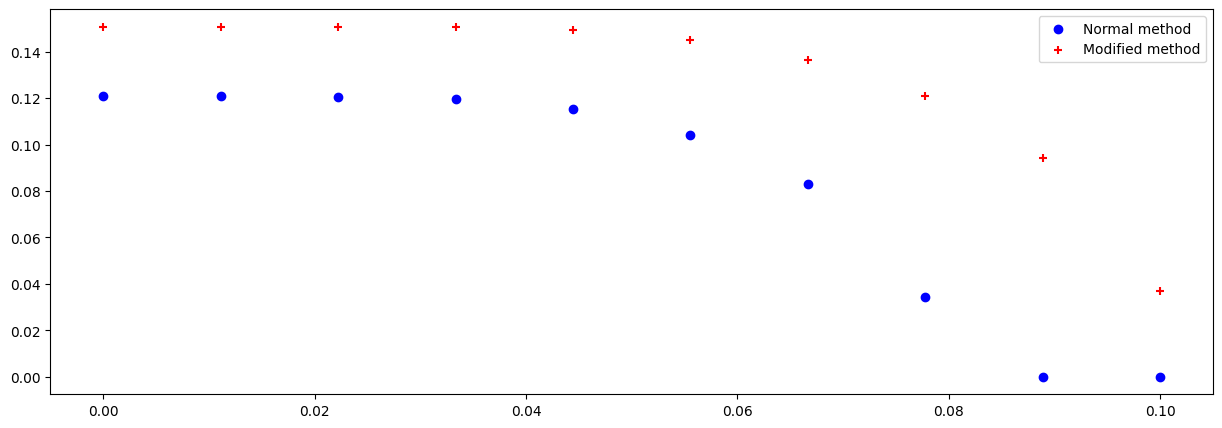

In [26]:
N = 20
Nc = 3
t = 1

mu = 1 * t
V = 1.5 * t

convergence_threshold = 1e-7

T_set = np.linspace(0, 0.1, 10)

# Calculating the gap parameter amplitude
fig, axs = plt.subplots(1, figsize=(15,5))

# Creating a BdG instance
solver = BdG_method(N, Nc, mu, t, V, T_set[0], convergence_threshold)
for i, T in enumerate(T_set):
    print(round(T, 2), end='\x1b[1K\r')
    solver.set_temperature(T)
    last_delta = solver.run_solver()
    if i == 0:
        axs.scatter(T, solver.get_global_delta(), color="blue", label="Normal method")    
    else:
        axs.scatter(T, solver.get_global_delta(), color="blue")    

print("")


# Creating a BdG instance
solver = MBdG_method(N, Nc, mu, t, V, T_set[0], convergence_threshold)
for i, T in enumerate(T_set):
    print(round(T, 2), end='\x1b[1K\r')
    solver.set_temperature(T)
    last_delta = solver.run_solver()
    if i == 0:
        axs.scatter(T, solver.get_global_delta(), color="red", marker="+", label="Modified method")    
    else:
        axs.scatter(T, solver.get_global_delta(), color="red", marker="+")    
    
axs.legend()

# Comparing the two methods.

# Seeing how it depends on $N_c$

In [23]:
N = 20
Nc_list = [1, 2, 3]
t = 1

#mu = 0.8 * t
V = 1.5 * t

T_set = np.linspace(0, 0.25, 30)

signs = ["+", "o", "x"]

convergence_threshold = 1e-8
t = 1

#mu_list = np.linspace(0, 2, 10) * t
mu_list = np.linspace(0.0, 1.0, 20) * t

Tc_lists = [[] for i in range(len(Nc_list)+1)]
delta0_lists = [[] for i in range(len(Nc_list)+1)]

for mu in mu_list:
    solvers = [
        BdG_method(N, 0, mu, t, V, T_set[0], convergence_threshold),
        MBdG_method(N, Nc_list[0], mu, t, V, T_set[0], convergence_threshold), 
        MBdG_method(N, Nc_list[1], mu, t, V, T_set[1], convergence_threshold), 
        MBdG_method(N, Nc_list[2], mu, t, V, T_set[2], convergence_threshold)
    ]

    print("Mu = {0}".format(mu), end=": ")

    deltas = [[] for i in range(len(Nc_list)+1)]
    for T in T_set:
        print(round(T, 2), end=" ")
        
        for i, solver in enumerate(solvers):
            solver.set_temperature(T)
            solver.run_solver()
            deltas[i].append(solver.get_global_delta())
        
    for i in range(len(solvers)):
        Tc_lists[i].append(find_critical_temperature(T_set, deltas[i]))
        delta0_lists[i].append(deltas[i][0])
        
    print("\n")

Mu = 0.0: 0.0 0.01 0.02 0.03 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.22 0.23 0.24 0.25 

Mu = 0.05263157894736842: 0.0 0.01 0.02 0.03 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.22 0.23 0.24 0.25 

Mu = 0.10526315789473684: 0.0 0.01 0.02 0.03 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.22 0.23 0.24 0.25 

Mu = 0.15789473684210525: 0.0 0.01 0.02 0.03 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.22 0.23 0.24 0.25 

Mu = 0.21052631578947367: 0.0 0.01 0.02 0.03 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.22 0.23 0.24 0.25 

Mu = 0.2631578947368421: 0.0 0.01 0.02 0.03 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.16 0.17 0.18 0.19 0.2

In [82]:
file = "pickles/delta0.pkl"
with open(file, "wb") as f:
    pickle.dump(delta0_lists, f)


https://stackoverflow.com/questions/25464295/dump-a-list-in-a-pickle-file-and-retrieve-it-back-later

In [4]:
temperature_file = "../cluster_runs/135399860-crit_temps.pickle"
deltas_file = "../cluster_runs/135399860-delta0s.pickle"

with open(temperature_file, 'rb') as f:
    Tc_lists = pickle.load(f)
with open(deltas_file, 'rb') as f:
    delta0_lists = pickle.load(f)

# with open(temperature_file, 'wb') as f:
#     pickle.dump(Tc_lists, f)
# with open(deltas_file, 'wb') as f:
#     pickle.dump(delta0_lists, f)


In [7]:
delta0_lists

[[0.1212456,
  0.120803796,
  0.12146855,
  0.12177037,
  0.122304015,
  0.12344414,
  0.12403918,
  0.12567,
  0.12676466,
  0.12856303,
  0.13036703,
  0.13234264,
  0.13477504,
  0.1371377,
  0.14006194,
  0.14298072,
  0.14636698,
  0.1499031,
  0.1538083,
  0.15797183],
 [],
 [],
 [],
 []]

NameError: name 'Nc_list' is not defined

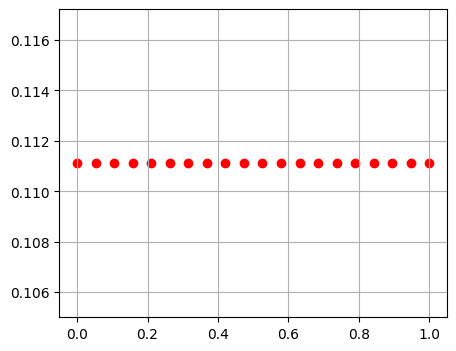

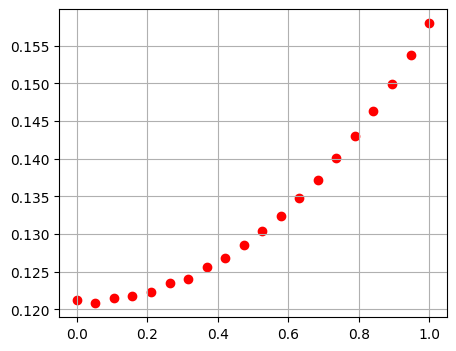

In [5]:
# mu_list = np.array([0, 0.1, 0.3, 0.5, 0.8, 1, 1.5, 2]) * t
t = 1
mu_list = np.linspace(0.0, 1.0, 20) * t
signs = ["+", "*", "x"]
colours = ["r", "b", "g", "purple"]

figsize = (5, 4)

fig1, ax1 = plt.subplots(figsize=figsize)
fig2, ax2 = plt.subplots(figsize=figsize)

ax1.grid()
ax2.grid()


ax1.scatter(mu_list, Tc_lists[0], c=colours[0], label="normal")  
ax2.scatter(mu_list, delta0_lists[0], c=colours[0], label="normal")  

for i in range(len(Nc_list)):
    ax1.scatter(
        mu_list, 
        Tc_lists[i+1], 
        c=colours[i+1], 
        marker=signs[i], 
        label="$N_c=${0}".format(i+1)
    )  
    ax2.scatter(
        mu_list, 
        delta0_lists[i+1], 
        c=colours[i+1], 
        marker=signs[i], 
        label="$N_c$={0}".format(i+1)
    )  
    
    #axs.scatter(T_set, run_history[mu][i+1], c="r", marker=signs[i], label="Modified method, Nc {0}".format(i+1))

size = 14
# axs.set_ylabel(f"$\Delta_0$ and $T_c$", fontname="monospace", fontsize=size)

ax1.set_xlabel("Chemical potential $\mu$", fontname="monospace",fontsize=size)
ax2.set_xlabel("Chemical potential $\mu$", fontname="monospace",fontsize=size)

ax1.set_ylabel("Critical temperature $T_c$", fontname="monospace",fontsize=size)
ax2.set_ylabel("Gap parameter $\Delta_0$", fontname="monospace",fontsize=size)
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

# ax1.set_title("Gap parameter $\Delta_0$")
# ax2.set_title("Critical temperature")

# axs.set_axisbelow(True)
ax1.legend()
ax2.legend()


fig1.tight_layout()
fig2.tight_layout()

# fig1.savefig("../report/figures/critical_temperature.eps", format="eps")
# fig2.savefig("../report/figures/delta0.eps", format="eps")

## Investigating system dependent on $\mu$

In [12]:
N = 20
t = 1

V = 1.5 * t

T_set = np.linspace(0, 0.2, 30)

signs = ["+", "o", "x"]

convergence_threshold = 1e-8
t = 1

mu_list = np.linspace(0.0, 1.0, 20) * t

delta0_list = []
Tc_list = []


for mu in mu_list:
    solver = MBdG_method(N, 3, mu, t, V, T_set[0], convergence_threshold)
    print("Mu = {0}".format(mu), end=": ")
    deltas = []
    for i, T in enumerate(T_set):
        print(round(T, 2), end=" ")
        solver.set_temperature(T)
        solver.run_solver()
        deltas.append(solver.get_global_delta())   
        
    delta0_list.append(deltas[0])
    Tc_list.append(find_critical_temperature(T_set, deltas))
    print("\n")

Mu = 0.0: 0.0 0.01 0.01 0.02 0.03 0.03 0.04 0.05 0.06 0.06 0.07 0.08 0.08 0.09 0.1 0.1 0.11 0.12 0.12 0.13 0.14 0.14 0.15 0.16 0.17 0.17 0.18 0.19 0.19 0.2 

Mu = 0.05263157894736842: 0.0 0.01 0.01 0.02 0.03 0.03 0.04 0.05 0.06 0.06 0.07 0.08 0.08 0.09 0.1 0.1 0.11 0.12 0.12 0.13 0.14 0.14 0.15 0.16 0.17 0.17 0.18 0.19 0.19 0.2 

Mu = 0.10526315789473684: 0.0 0.01 0.01 0.02 0.03 0.03 0.04 0.05 0.06 0.06 0.07 0.08 0.08 0.09 0.1 0.1 0.11 0.12 0.12 0.13 0.14 0.14 0.15 0.16 0.17 0.17 0.18 0.19 0.19 0.2 

Mu = 0.15789473684210525: 0.0 0.01 0.01 0.02 0.03 0.03 0.04 0.05 0.06 0.06 0.07 0.08 0.08 0.09 0.1 0.1 0.11 0.12 0.12 0.13 0.14 0.14 0.15 0.16 0.17 0.17 0.18 0.19 0.19 0.2 

Mu = 0.21052631578947367: 0.0 0.01 0.01 0.02 0.03 0.03 0.04 0.05 0.06 0.06 0.07 0.08 0.08 0.09 0.1 0.1 0.11 0.12 0.12 0.13 0.14 0.14 0.15 0.16 0.17 0.17 0.18 0.19 0.19 0.2 

Mu = 0.2631578947368421: 0.0 0.01 0.01 0.02 0.03 0.03 0.04 0.05 0.06 0.06 0.07 0.08 0.08 0.09 0.1 0.1 0.11 0.12 0.12 0.13 0.14 0.14 0.15 0.16 0.17

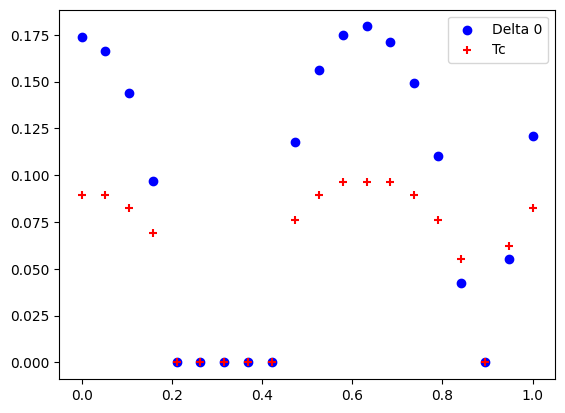

In [5]:
fig, ax = plt.subplots()

ax.scatter(mu_list, delta0_list, c="b", label="Delta 0")
ax.scatter(mu_list, Tc_list, c="r", marker="+", label="Tc")

ax.legend()

In [11]:
with open("pickles/mu_comp_normal_delta0.pkl", "wb") as f:
    pickle.dump(delta0_list, f)

In [31]:
N = 40
t = 1

V = 1.5 * t

T_set = np.linspace(0.06, 0.08, 20)

T_set = np.insert(T_set, 0, 0)

convergence_threshold = 1e-9
t = 1

# mu_list = np.linspace(0.0, 2.0, 20) * t

# delta0_list = []
# Tc_list = []

mu = 0.1

solver = BdG_method(N, 0, mu, t, V, T_set[0], convergence_threshold)
print("Mu = {0}".format(mu), end=": ")
deltas = []
for i, T in enumerate(T_set):
    print(round(T, 2), end=" ")
    solver.set_temperature(T)
    solver.run_solver()
    deltas.append(solver.get_global_delta())   
    
# delta0_list.append(deltas[0])
# Tc_list.append(find_critical_temperature(T_set, deltas))
print("\n $\Delta_0$: {0}, $T_c = $ {1}".format(deltas[0], find_critical_temperature(T_set, deltas)))

print("\n")

Mu = 0.1: 0.0 0.06 0.06 0.06 0.06 0.06 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.08 0.08 0.08 0.08 0.08 
 $\Delta_0$: 0.1123056635260582, $T_c = $ 0.06736842105263158




In [32]:
calculate_critical_temperature(0.1123)

0.06380681818181817